# Convolutional Networks in Keras
This notebook shows you how to create a simple CNN (convolutional neural network) in Keras.

## Loading MNIST
This part of the code is the same as before. We just download and normalize the dataset.

In [0]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.expand_dims(x_train, 3)
x_test=np.expand_dims(x_test, 3)

# Normalize the training and test data, helps the training algorithm
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
x_train.shape

(60000, 28, 28, 1)

## Conv2D layer in Keras

The normal Convolutional layer is in the ***keras.layers*** module. Its main parameters are:
```
keras.layers.Conv2D(filters, 
                   kernel_size, 
                   strides=(1, 1), 
                   padding='valid', 
                   activation=None)
```

**Main arguments**

*  **filters:** Positive integer, the number of filters, or the depth dimension of the output.
* **kernel_size:** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides:** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. 
* **padding:** One of "valid" or "same" (case-insensitive). When you apply a (let's sya 3x3) convolution on an NxN input, the output will be (N-2)x(N-2) because at the edges the filter can't "go out" of the input image boundaries. If you would like to have NxN output, you have to pad the input to (N+2)x(N+2). This option controls the padding: `valid` means no padding, `same` means padding with zeros such that the input and the output will have the same size.
*  **activation:** Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x). 




## Example Keras model on MNIST dataset
In this section we will train a simple CNN that recognizes digits in the dataset. The following image shows the network architecture:
![architecture](https://docs.google.com/uc?export=download&id=
1Anmu9juijuRXB1mdfBF8gOSjgiRbM44K)

It has two Convolutional layers followed by MaxPool layers, and finallytwo fully connected layers for classification.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from keras.utils import plot_model

import matplotlib.pyplot as plt

In [0]:
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()),
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Similarly to a dense network, we have simply added the convolutional and MaxPooling layers to our Sequential model.

In [0]:
# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified

Next we print out the model architecture. Observe how the 28x28 input was decresed to 26x26 after the first convolution. Also check that MaxPooling halved the resolution.

In [0]:
# Prints a summary representation of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

Compare the number of parameters to that of the fully connected model from the previous notebok. It was 407500, the current model is 4 times smaller! It will train faster as well.

In [0]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 292us/step - loss: 0.1412 - acc: 0.9575 - val_loss: 0.0571 - val_acc: 0.9824
Epoch 2/30
60000/60000 [==============================] - 13s 221us/step - loss: 0.0472 - acc: 0.9853 - val_loss: 0.0343 - val_acc: 0.9895
Epoch 3/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0328 - acc: 0.9896 - val_loss: 0.0279 - val_acc: 0.9903
Epoch 4/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0319 - val_acc: 0.9888
Epoch 5/30
60000/60000 [==============================] - 13s 217us/step - loss: 0.0180 - acc: 0.9941 - val_loss: 0.0289 - val_acc: 0.9906
Epoch 6/30
60000/60000 [==============================] - 13s 216us/step - loss: 0.0135 - acc: 0.9954 - val_loss: 0.0300 - val_acc: 0.9906
Epoch 7/30
60000/60000 [==============================] - 13s 217us/

Now we plot the training curves. The training curves shows how the loss and accuracy changes over time. It is a useful tool to debug the network. We will go into it in later lectures. By looking at the plots, you can see if the network is still training or has actually converged and you can stop training.

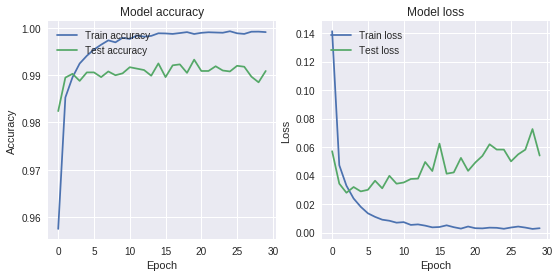

In [0]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [0]:
# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 0.05400696766095862
Test accuracy: 99.09%


We got a model that has a 99% classification accuracy. This is a 50% lower error rate than our previous fully connected model that 4 times as many parameters. Now check out what happens, if we translate the images by 2 pixels:

In [0]:
x_trans=np.zeros_like(x_test)
x_trans[:,2:,:]=x_test[:,:-2,:]
model.evaluate(x_trans, y_test, verbose=0)

[0.3205677197408953, 0.9543]

The accuracy is 95.4%. Compared to the 89% we got earlier, this is much better, it shows a more robust model to translation.

# Tasks and experiments
Here are the problems to solve:

* Change the padding in the Convolutional layers so that the output and the input have the same size.
* Looking at the loss curves, you can see that the test loss started to increase from around 5th epoch. Add Early Stopping to the model to prevent overfitting. In Keras, you can do that using the [EarlyStoping](https://keras.io/callbacks/#earlystopping) [callback](https://keras.io/callbacks/).
* Download the CIFAR-10 dataset and apply the CNN we used for the MNIST dataset. Try adding more layers to improve the results. (The CIFAR-10 is included in Keras, you can find more information at [keras.io/datasets](https://keras.io/datasets/))